<a href="https://colab.research.google.com/github/hmyrcmn/deepLearningProjects/blob/main/NN_neurolNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

x,y=fetch_openml ("mnist_784",
                  version=1,
                  return_X_y=True,
                  as_frame=False)

x=x/255.0
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.7)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [9]:
import pandas as pd
data=pd.DataFrame(x)
data.insert(744,'label',y)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
data.shape

(70000, 785)

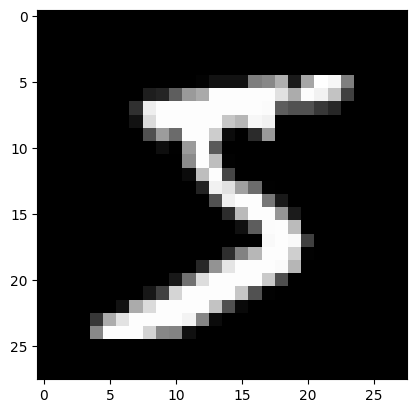

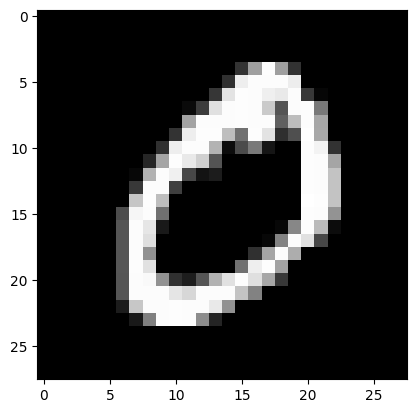

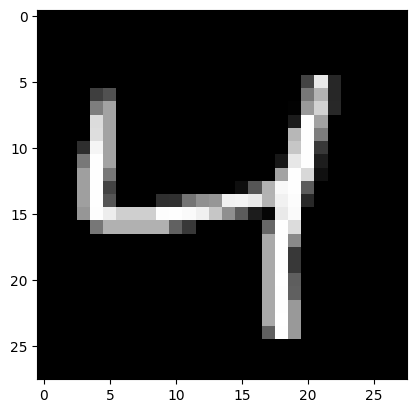

In [18]:
import matplotlib.pyplot as plt
for i in range(3):
  plt.imshow(x[i].reshape((28,28)),cmap="gray")
  plt.show()

In [24]:
from sklearn.neural_network import MLPClassifier
m1=MLPClassifier(hidden_layer_sizes=10,activation='logistic')
m2=MLPClassifier(hidden_layer_sizes=100,activation='logistic')
m3=MLPClassifier(hidden_layer_sizes=1000,activation='logistic')

m1.fit(X_train,y_train)
m2.fit(X_train,y_train)
m3.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=1000)

In [25]:
predictions_nn1=m1.predict(X_test)
predictions_nn2=m2.predict(X_test)
predictions_nn3=m3.predict(X_test)



In [26]:
print("nn1: ",predictions_nn1)
print("nn2:",predictions_nn2)
print("nn3:",predictions_nn3)
print("y: ",y_test)

nn1:  ['0' '4' '1' ... '8' '3' '2']
nn2: ['0' '4' '1' ... '8' '3' '9']
nn3: ['0' '4' '1' ... '8' '3' '9']
y:  ['0' '4' '1' ... '8' '3' '9']


In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions_nn1)

array([[4652,    0,   44,   11,   19,   51,   64,   20,   48,    2],
       [   1, 5359,   29,   36,   11,   23,    5,   18,   49,   13],
       [  37,   45, 4437,   70,   65,   19,   77,   48,   90,    8],
       [  14,   34,  127, 4448,   10,  179,    9,   52,   81,   32],
       [   9,   15,   39,    4, 4485,   12,   45,   16,   20,  123],
       [  50,   35,   42,  144,   43, 3817,   74,   21,  108,   50],
       [  31,   26,   80,    0,   58,   50, 4510,    3,   21,    1],
       [  16,   18,   75,   22,   46,   14,    1, 4674,   30,  176],
       [  38,  108,   69,   57,   25,  179,   59,   29, 4159,   34],
       [  24,   16,   16,   52,  193,   31,    5,  152,   45, 4368]])

In [28]:
confusion_matrix(y_test,predictions_nn2)

array([[4803,    1,   12,    6,    9,   15,   27,    4,   28,    6],
       [   1, 5461,   21,   11,    5,    5,    5,   10,   17,    8],
       [  17,   10, 4682,   26,   37,    9,   18,   45,   45,    7],
       [  13,   13,   67, 4713,    4,   71,    5,   34,   47,   19],
       [   5,   11,   16,    3, 4614,    4,   19,   10,    7,   79],
       [  20,   11,   16,   57,   14, 4178,   43,    9,   18,   18],
       [  25,   10,   30,    4,   27,   18, 4636,    9,   21,    0],
       [   5,   15,   36,   12,   38,    7,    0, 4916,    7,   36],
       [  20,   34,   30,   45,   10,   40,   16,    7, 4524,   31],
       [  21,    9,    6,   32,   87,   24,    1,   68,   20, 4634]])

In [29]:
confusion_matrix(y_test,predictions_nn3)

array([[4812,    1,   13,    7,    6,   13,   24,    4,   21,   10],
       [   1, 5467,   25,   11,    5,    1,    6,    9,   10,    9],
       [  14,    7, 4750,   25,   27,    1,   13,   32,   22,    5],
       [   6,   10,   60, 4773,    4,   51,    2,   16,   46,   18],
       [   6,   12,   16,    3, 4624,    2,   16,    9,    6,   74],
       [  13,    6,   13,   48,    7, 4219,   34,    7,   20,   17],
       [  18,   10,   18,    4,   17,   21, 4670,    8,   14,    0],
       [   1,   18,   40,   17,   32,    7,    0, 4905,    5,   47],
       [  15,   31,   22,   39,   13,   30,   18,    2, 4560,   27],
       [  17,    9,    2,   35,   56,   22,    3,   54,   16, 4688]])

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_nn1))
print(classification_report(y_test,predictions_nn2))
print(classification_report(y_test,predictions_nn3))


              precision    recall  f1-score   support

           0       0.95      0.95      0.95      4911
           1       0.95      0.97      0.96      5544
           2       0.89      0.91      0.90      4896
           3       0.92      0.89      0.90      4986
           4       0.91      0.94      0.92      4768
           5       0.87      0.87      0.87      4384
           6       0.93      0.94      0.94      4780
           7       0.93      0.92      0.93      5072
           8       0.89      0.87      0.88      4757
           9       0.91      0.89      0.90      4902

    accuracy                           0.92     49000
   macro avg       0.92      0.92      0.92     49000
weighted avg       0.92      0.92      0.92     49000

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      4911
           1       0.98      0.99      0.98      5544
           2       0.95      0.96      0.95      4896
           3       0.96 

# agore the solutions ı decided schoose the firt model of 10 layers poverful than the other layer and succes stations